# Milestone 1: Exploratory Data Analysis

**Authors**: __Khizer Zakir & Rodrigo Brust Santos__

__October 2023__

## 3. Statistical Exploration

### Description

In this section, our focus shifts to a comprehensive exploration of the dataset, summary statistics and descriptive statistics. The primary goal is to extract meaningful insights from the data, building upon the visualizations presented in the preceding section.

We begin by delving into summary statistics, a concise yet powerful way to encapsulate key characteristics of the dataset. These statistics offer a snapshot of central tendencies, dispersions, and distributions within the data, aiding in the identification of patterns and anomalies.

Building upon the foundation laid by visualizations in the previous section, we extend our analysis to include detailed descriptions of the dataset's nuances. By combining statistical measures with visual representations, we aim to provide a holistic understanding of the dataset's structure and underlying patterns.

A crucial aspect of our examination involves scrutinizing the distribution of the target variables in both the training and test sets. This scrutiny allows us to assess the consistency and comparability of these distributions, laying the groundwork for robust model development. Furthermore, we explore the implications of correlations among variables, shedding light on potential relationships that can significantly impact model performance.

As we progress, we outline the pre-processing steps undertaken to refine and prepare the data for modeling. These steps are carefully considered to address issues such as missing values, outliers, and multicollinearity. The rationale behind each pre-processing decision is elucidated, providing transparency and context for the chosen methodologies.

In closing, we not only document the steps taken for pre-processing but also present a roadmap for prospective future endeavors. This forward-looking perspective sets the stage for ongoing refinement and enhancement of the dataset, ensuring its continual alignment with the evolving needs of our analytical journey.

In [27]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time 
from tabulate import tabulate
import warnings

warnings.filterwarnings('ignore')

### 3.1 Descriptive Statistical Analysis
Conduct a descriptive statistical analysis of the dataset.

In [28]:
# using describe function

df_train = pd.read_csv('../training.csv')
df_test = pd.read_csv('../testing.csv')
summary_train= df_train.describe()
summary_test= df_test.describe()
print(tabulate(summary_train, headers='keys', tablefmt='pretty'))
print(tabulate(summary_test, headers='keys', tablefmt='pretty'))


+-------+--------------------+--------------------+---------------------+--------------------+-------------------+--------------------+--------------------+---------------------+---------------------+---------------------+-------------------+--------------------+--------------------+--------------------+--------------------+-------------------+-------------------+---------------------+----------------------+---------------------+---------------------+--------------------+-------------------+--------------------+---------------------+-------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+---------------------+--------------------+--------------------+--------------------+--------------------+---------------------+--------------------+--------------------+--------------------+-------------------+--------------------+--------------------+
|       |         x          |         y          |      Ag (

#### Please refer to the visulization part [02_visual_exploration.ipynb] to better understand the statistics of the dataset

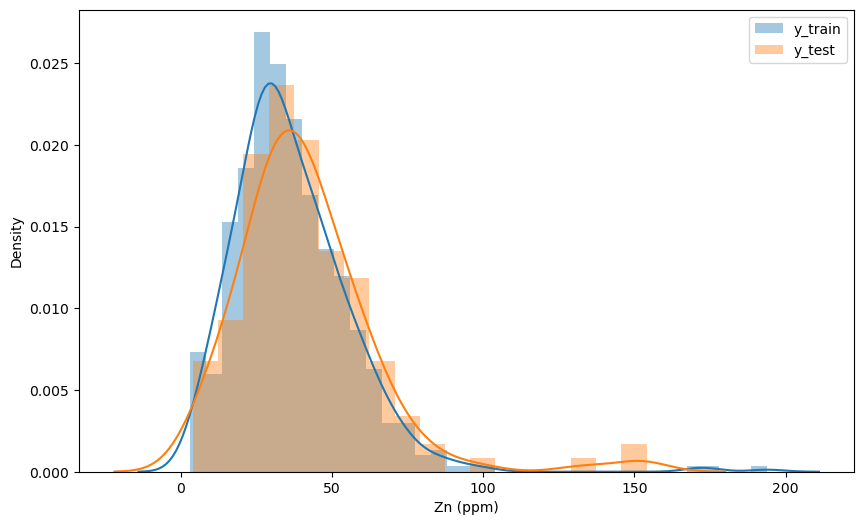

In [29]:
# x and y from training set
# all the variables except zn(ppm)
x_train = df_train.iloc[:, :-1]
x_test = df_test.iloc[:, :-1]
y_train = df_train.iloc[:, -1]
y_test = df_test.iloc[:, -1]

# plot the distribution of y_train and y_test to check there distribution

plt.figure(figsize=(10,6))
sns.distplot(y_train, label='y_train')
sns.distplot(y_test, label='y_test')
plt.legend()
plt.show()



### Distribution of train target and test target:

The distribution of test data is equally crucial to a machine learning model's effectiveness. The test data assess the model's performance on new, untested data. The model's performance on the test data will be a good indicator of its performance on new data if the test data is taken from the same distribution as the training data. A mismatch in distributions could lead to misleading performance estimates.

The model's performance on the test data may be a poor signal of its performance on new data if the test data are taken from a different distribution than the training data. This is because the model may have trained to base its predictions on traits exclusive to the training data and may not be present in the test data. ([tutorialspoint](https://www.tutorialspoint.com/distribution-of-test-data-vs-distribution-of-training-data#:~:text=The%20Importance%20of%20the%20Distribution%20of%20Test%20Data&text=The%20test%20data%20assess%20the,distribution%20as%20the%20training%20data. "Distribution of Test Data vs. Distribution of Training Data"))

In this case, the distribution is consistent, which is a good sign. In addition, it is evenly distributed around the mean as well. 


### 3.2 Correlation Analysis
Determine the potential correlation between variables and comment on its implications for machine learning.


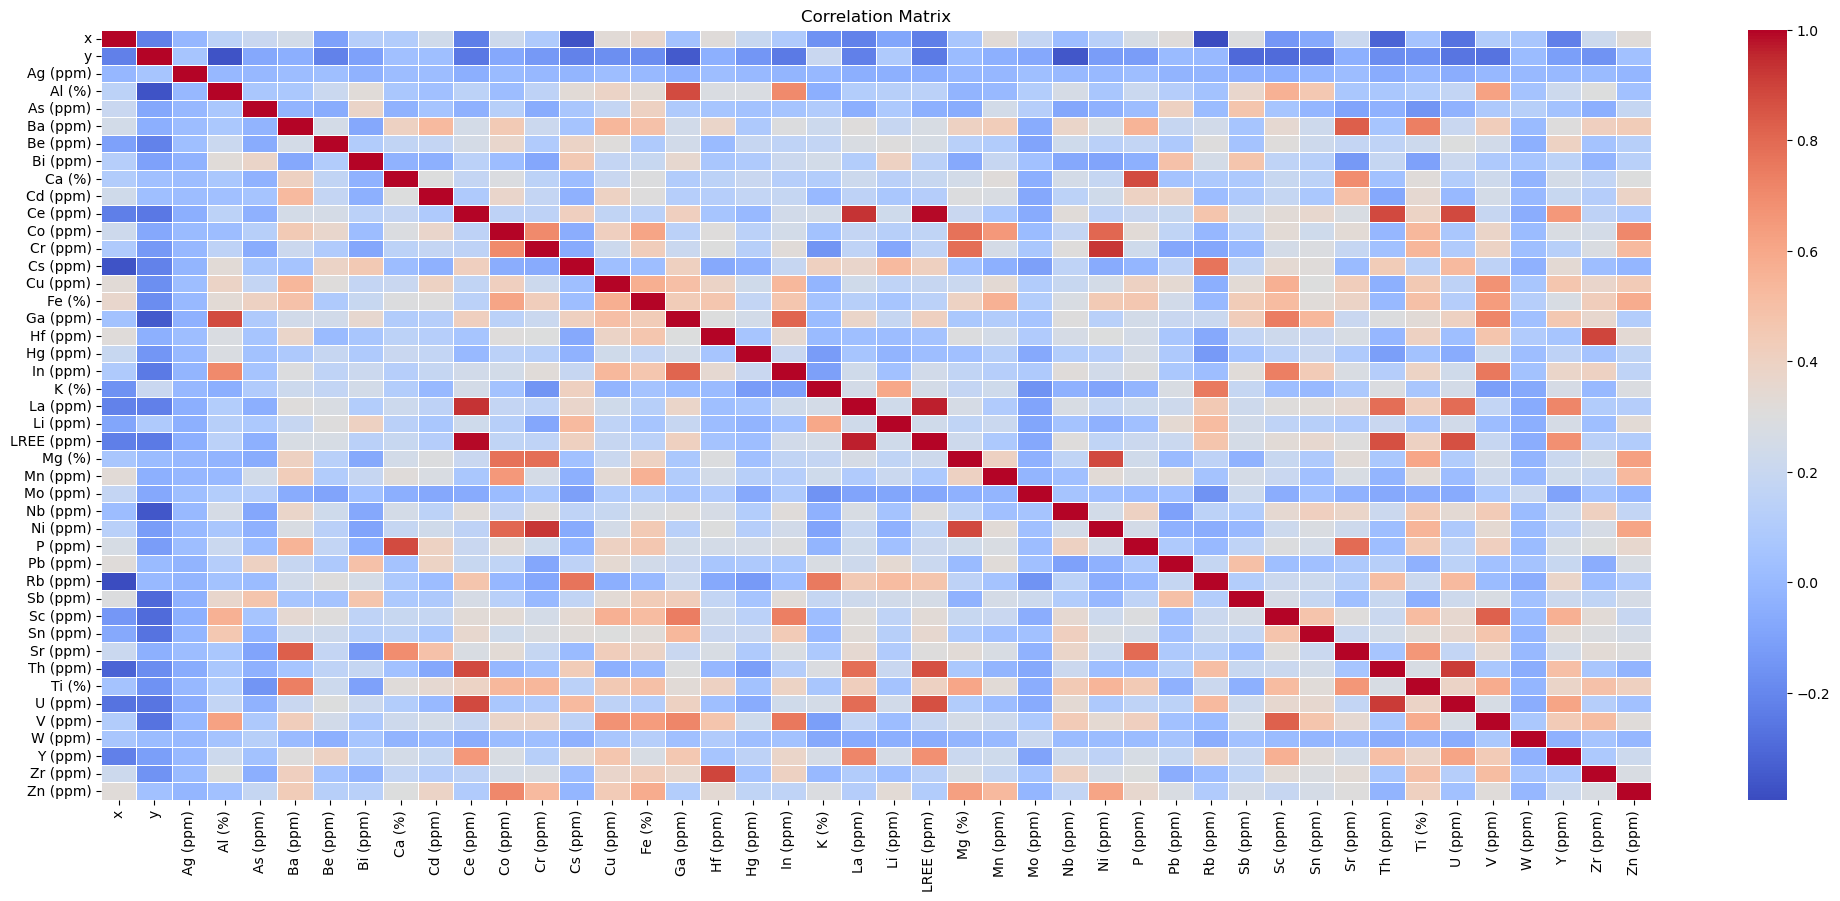

Top correlated features with the target variable:
Zn (ppm)      1.000000
Co (ppm)      0.709986
Mg (%)        0.627962
Ni (ppm)      0.608913
Fe (%)        0.583302
Mn (ppm)      0.530180
Cr (ppm)      0.521760
Cu (ppm)      0.439631
Ba (ppm)      0.437724
Ti (%)        0.410584
Cd (ppm)      0.387811
P (ppm)       0.360146
Hf (ppm)      0.337060
Li (ppm)      0.332351
x             0.319681
V (ppm)       0.314708
Sr (ppm)      0.303907
Ca (%)        0.298744
K (%)         0.288192
Pb (ppm)      0.279646
Zr (ppm)      0.278434
Sb (ppm)      0.262588
Sn (ppm)      0.258714
Y (ppm)       0.220457
Sc (ppm)      0.193466
As (ppm)      0.186731
Nb (ppm)      0.177158
Hg (ppm)      0.162146
In (ppm)      0.160657
Bi (ppm)      0.134597
Be (ppm)      0.127754
La (ppm)      0.113256
Ga (ppm)      0.109256
LREE (ppm)    0.106421
Ce (ppm)      0.101265
Rb (ppm)      0.097199
Al (%)        0.039455
U (ppm)       0.037953
y             0.037796
W (ppm)      -0.009605
Mo (ppm)     -0.016345
Ag (ppm

In [25]:
target_variable = df_train.columns[-1]

# Calculate correlation matrix
correlation_matrix = df_train.corr()

# Plot heatmap of the correlation matrix
plt.figure(figsize=(25, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

# Extract correlations with the target variable
target_correlations = correlation_matrix[target_variable].sort_values(ascending=False)

# Display top correlated features with the target variable
print("Top correlated features with the target variable:")
print(target_correlations)


### Comment on correlation

In the exploratory phase of our project, we acknowledge the intuitive assumption that many variables are expected to be independent, lacking strong correlations to enhance their influence on the model. However, to validate these assumptions rigorously, statistical significance tests are crucial. At this point, the dataset doesn't exhibit a normal distribution, hindering the application of certain tests. Therefore, our preprocessing strategy involves normalizing and standardizing the data to meet the assumptions of these tests. Once the data is transformed, we plan to employ statistical tests such as the chi-square test, p-test, and t-test to uncover stronger correlations among the explanatory variables. These tests will provide a more robust understanding of the relationships within the dataset, aiding us in selecting relevant features for our predictive model.

#### Correlation Summary for this dataset

There is only a few high positive correlations from the explanatory variables against the targer variable. While, there are some negative corraltions as well. This has been observed as a good omen for regeression analysis. As there are no high correlations, the regression of the target variable will not have strong influence of a particulary highly correlated variable. Instead it will train well to perform better even in the absence or changes in that particular target variable.

- Specific details:

Co has a strong positive correlation of 0.71 with the target; Mg , Ni, and Fe also show strong positive correlations (around 0.63 to 0.58). While Several other features, such as Mn, Cr, Cu, Ba, Ti, Cd, P, and Hf, exhibit moderate positive correlations (ranging from 0.53 to 0.41). Some features like Al, U, and target variable have weak positive correlations (around 0.04). Features like W, Mo, Ag, Cs, and Th show weak negative correlations.

These feature-target correlations help us understand the following:


- Feature Selection:

Understanding feature-target correlations helps in feature selection. Features with low or no correlation with the target variable may have limited predictive power and could potentially be excluded from the model to simplify it.

- Model Interpretability:

When interpreting machine learning models, understanding the relationships between features and the target variable is crucial. Features with significant correlations provide insights into how changes in those features influence the predicted outcome.

#### Note 

It's important to note that correlation does not imply causation. These relationships are based on linear correlations and may not capture complex, non-linear dependencies. It might be beneficial to visualize some of the highly correlated features using scatterplots or conduct more advanced analysis to understand the nature of these relationships.
Remember, correlation is just one aspect of understanding relationships between variables, and the context of your specific analysis should guide the interpretation of these correlations.


### 3.3 Pre-processing

Introduce potential pre-processing steps (e.g., handling outliers, missing values, normalization).

- `Normalization`: since we have several types of elements and due to their different behaviours in the nature, it was be necessary to normalize the data, step done in `01_data_description.ipynb`. For that, the log-normalization operation was the chosen one. The *numpy* function `np.log10()` was be used to compute the normalization of all element values. Such operation reduces the variance of the data besides preserving the positive values of it.

- `Missing Values`: the dataset has no missing values or NaNs. 

- `Handling Outliers`: in normal statistics, outliers are not good for the model. However, in geology and geochemistry, the main goal of the whole analysis is to find outliers. The deposits are found due to the anomalous presence of an element in a sample. Therefore, in this case, it will not be necessary to hadle outliers. It is expected that they are highlighted.

- `Data Cleaning`: the dataset needed some light data cleaning, which was already done in `01_data_description.ipynb`
. These small cleanings consisted in:
    - Removing elements that are not statistically significant - less than 50% in occurrence in the samples.
    - Removing signs of `<` and `>` and then sticking the value either to the lowest or highest. For example, if an element is <10ppm, it means that it could not be detectable by the machine that processes the samples due to the fact that it is below the lowest limit for the machine. The opposite might also happen. Since it's impossible to measure values above or below the thresholds of the machine, we stick to these limits.
    - Transforming all values that were `obj` to `float64`.